# RockingData Challenge

Marketing para un banco de Portugal

Usando anaconda env

> conda create --name marketing python=3.11

> conda install --yes --file requirements.txt


## Librerias

In [1]:
import numpy as np
import pandas as pd
import tqdm as notebook_tqdm
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

from modules.utils import summary_statistics,\
                    summary_statistics_comparative,\
                    plot_distributions,\
                    distanceMatrix


## EDA

### Análisis express usando ydata_profiling

Esta librería procesa las variables del dataset, una a una, evaluando:

- Tipo de dato
- Estadísticos básicos (mean, min, max)
- Distribuciones
- Uniques, Missing, Infinite, Zeros
- Duplicados
- Interacciones o pairplots de numéricas
- Correlación entre numéricas de numéricas

Este tipo de herramientas permite un rápido vistazo, para luego profunzidar en lo que amerita.

Limitante: resulta lento o impracticable con un dataset de cientos de variables, lo que amerita evaluar la relevancia de variables de forma previa.

In [2]:
df_ori = pd.read_csv('data/bank-additional-full.csv', sep=';')

In [ ]:
df_ori.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
profile = ProfileReport(df_ori, title="Bank Marketing")

In [5]:
# profile.to_file("EDA_report_Bank_Marketing.html")

## Diccionario de variables

**Bank client data:**

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

**Related with the last contact of the current campaign:**

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**Other attributes:**

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**Social and economic context attributes**

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target):**

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')


## Data Quality

### Missing

En la información se aclara que hay missing values en variables categóricos. 

En realidad, el dataset provisto los tiene indicados como "unkown".

Estas son:

- marital < 1 %
- education 4 %
- default 21 %
- housing 2 %
- loan 2 %

In [6]:
### No se tomarán medidas con los missings, considerándolos como nuevas categorías

### Duplicates

Encontramos una mínima cantidad de missing values, que resulta práctico eliminar.

In [7]:
df_ori.drop_duplicates(inplace=True)

## Data Drifting

Al tratarse de un dataset atemporal, o una única foto extraída sin datos históricos, el data drifting no es un problema.

En futuras versiones del modelo, con info de los clientes en distintos períodos de tiempo (meses por ejemplo), esto debe ser revisado.

In [8]:
### NO APLICA

## Feature engineering

La ingeniería de variables resulta un paso crucial en el desarrollo de modelos predictivos. En este challenge, devido a la escaza cantidad de features originales, avanzaré sin crear variables.

**Consideraciones a futuro:**

> Contar con un dataset temporal, al menos que defina el tiempo presente, permitará trabajar con diferencias de fechas (por ejemplo con dias/semanas desde el último contacto).

> Contar otros datos de los clientes, variables como: balance, ingresos, gastos, transacciones, deudas y productos bancarios; puede ser muy benificioso para mejorar el perfomance de la solución.

> Conocer la normativa de Portugal, respecto al pago de aguinaldos, sería bueno para saber que meses pueden ser más productivos para colocar plazos fijos.

In [9]:
### MEJORA

## Target

La variable objetivo y, que parece indicar la conversión de la venta de "plazo fijo", tiene ~11 % de casos positivos y ~89 negativos.

Este desbalance no motiva, a priori, tomar ninguna medida de balanceo. Sin embargo, sí sesga métricas como el accuracy.

## Ventas vs. no-venta

Para entender las condiciones de venta vs. los casos donde las campaña no fue exitosa, se procede a visualizar los datos según la variable target.

In [10]:
target = 'y' 

print("Resumen Estadístico - Comparativo")
key1= 'yes'
key2= 'no'
stats=['count', 'mean', '50%', 'std']
summary_stats_combined = summary_statistics_comparative(df_ori.loc[df_ori[target] == key1], 
                                                        df_ori.loc[df_ori[target] == key2], 
                                                        key1, key2, stats=stats)
print(summary_stats_combined.to_markdown())


Resumen Estadístico - Comparativo
|                |   ('yes', 'count') |   ('no', 'count') |   ('yes', 'mean') |   ('no', 'mean') |   ('yes', '50%') |   ('no', '50%') |   ('yes', 'std') |   ('no', 'std') |
|:---------------|-------------------:|------------------:|------------------:|-----------------:|-----------------:|----------------:|-----------------:|----------------:|
| age            |               4639 |             36537 |         40.9123   |        39.911    |           37     |          38     |        13.8388   |        9.89718  |
| duration       |               4639 |             36537 |        553.256    |       220.868    |          449     |         164     |       401.191    |      207.116    |
| campaign       |               4639 |             36537 |          2.05195  |         2.63339  |            2     |           2     |         1.66635  |        2.87377  |
| pdays          |               4639 |             36537 |        791.991    |       984.109    |   

Graficando distribuciones y frecuencias según target
Variables numéricas


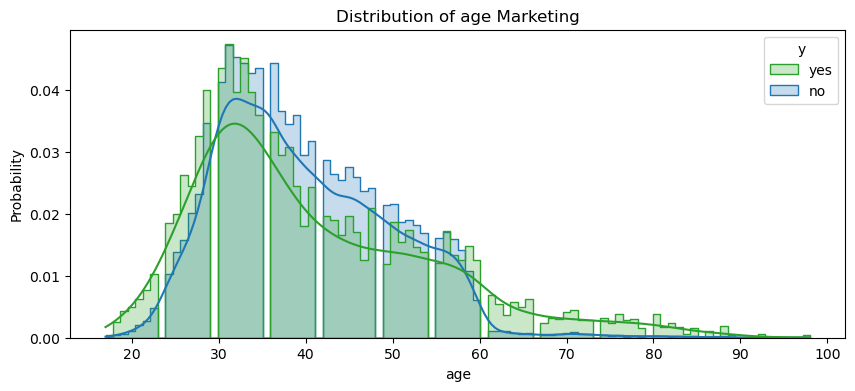

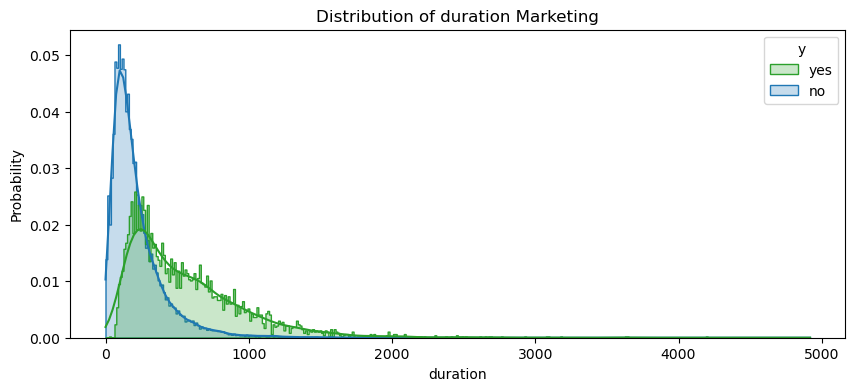

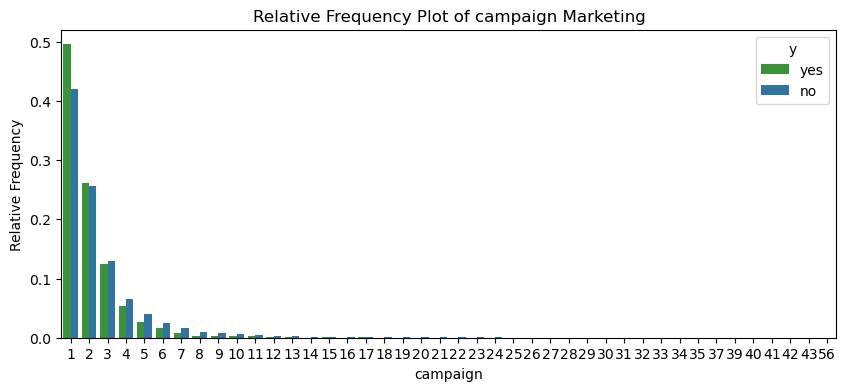

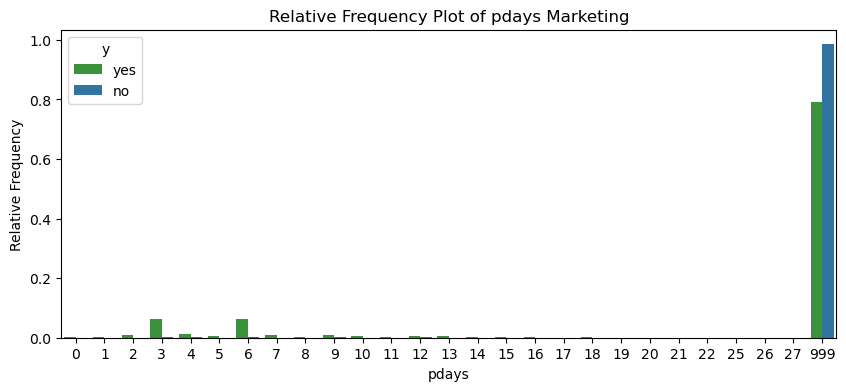

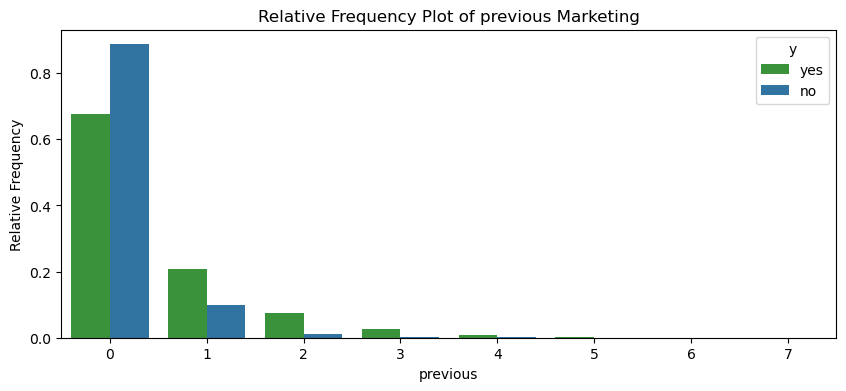

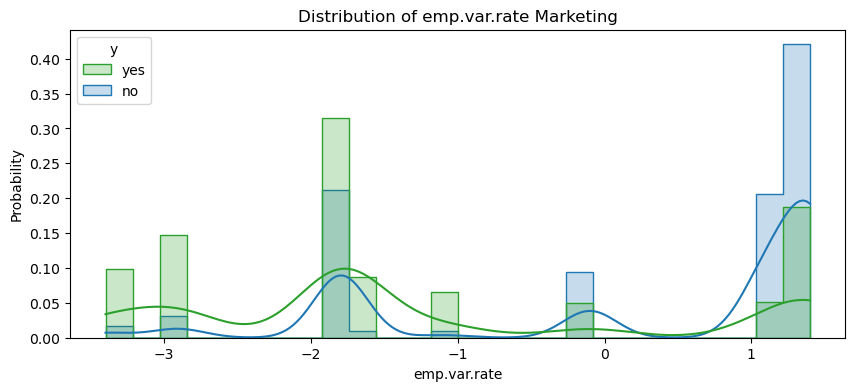

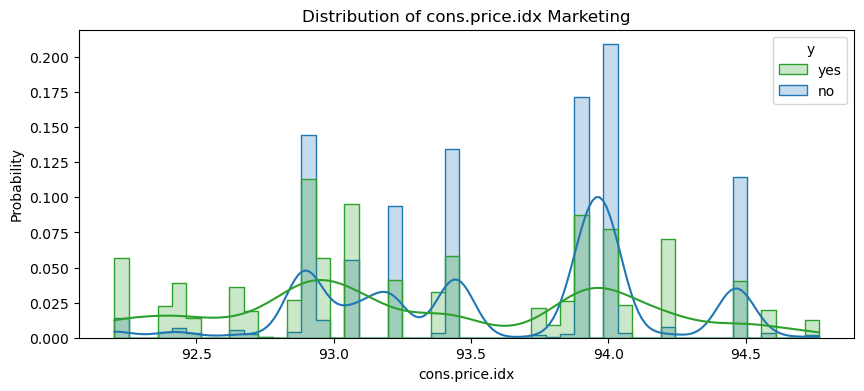

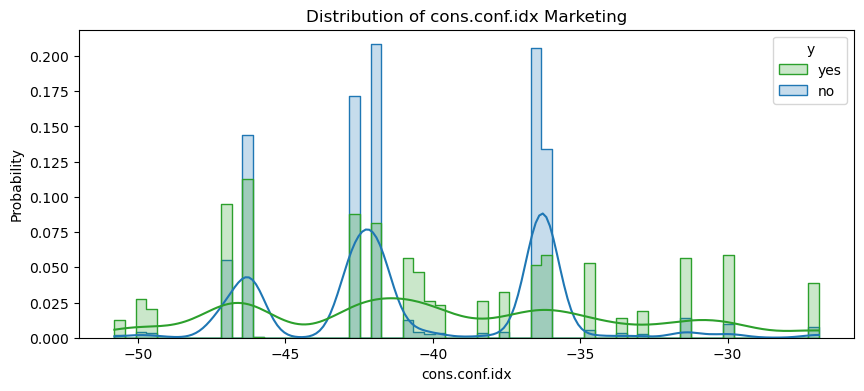

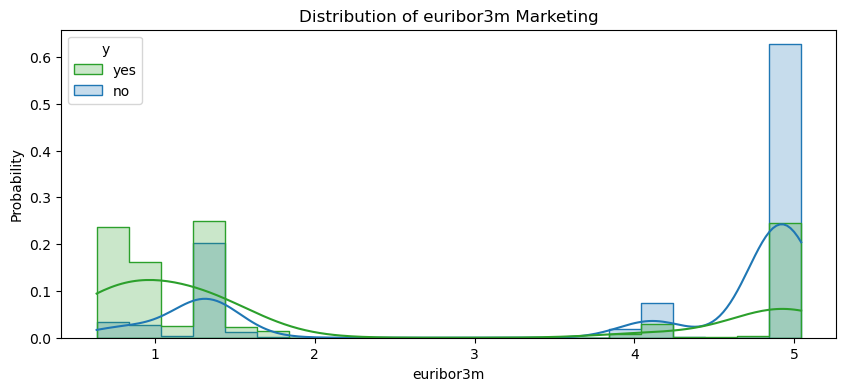

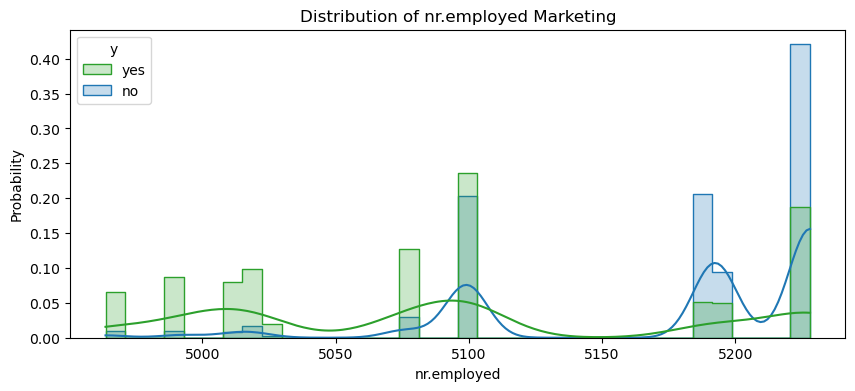

Variables categóricas o booleanas


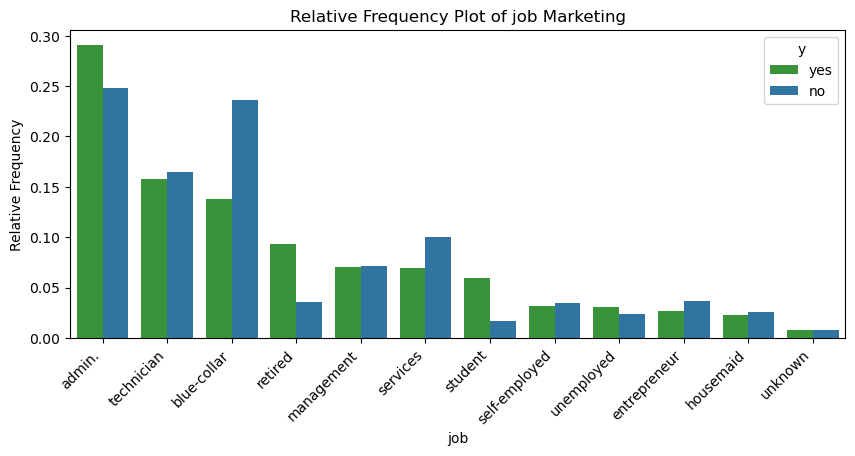

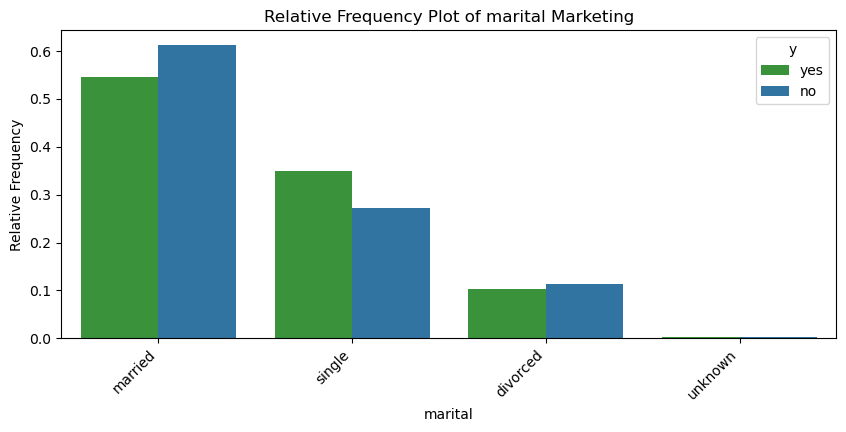

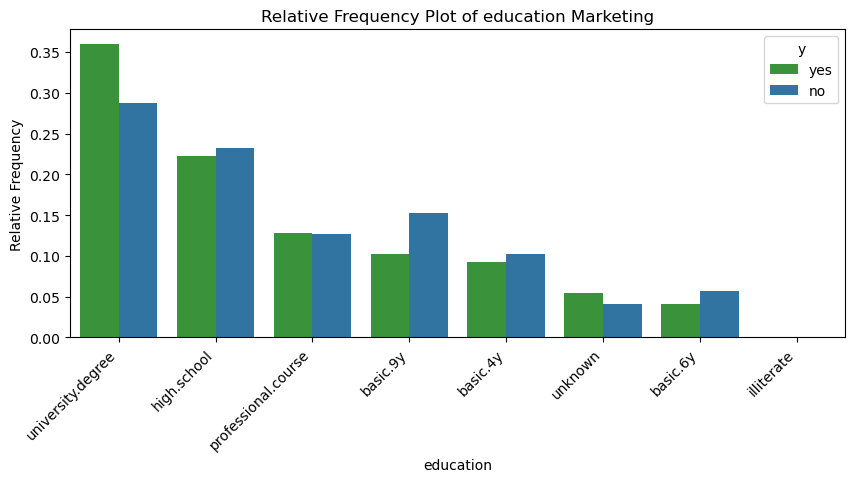

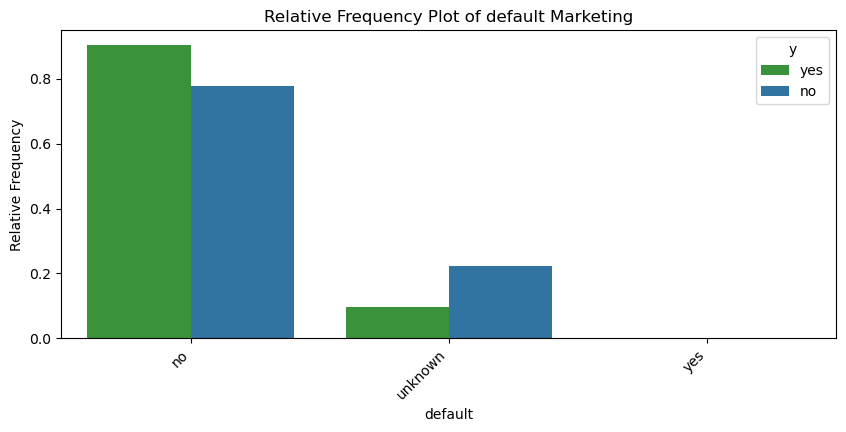

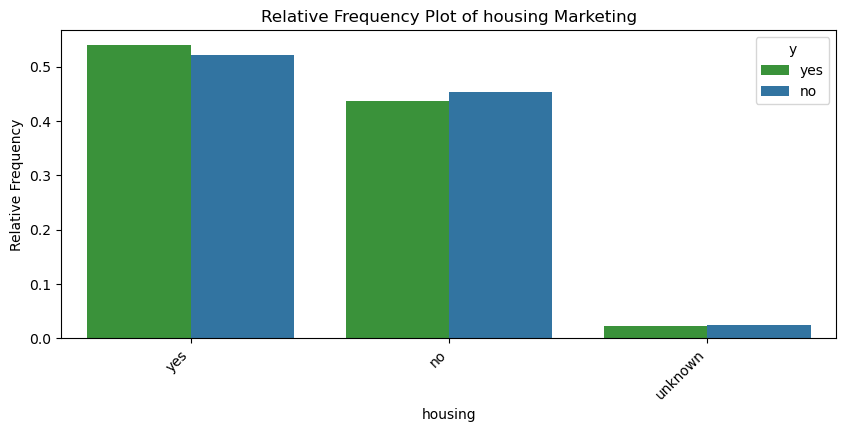

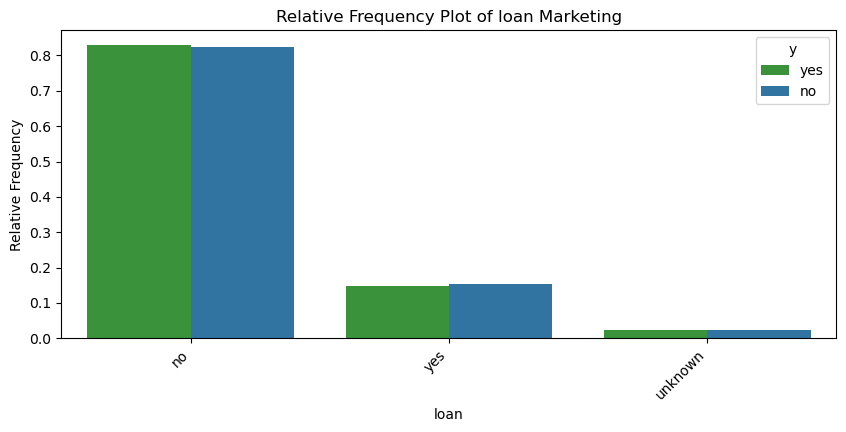

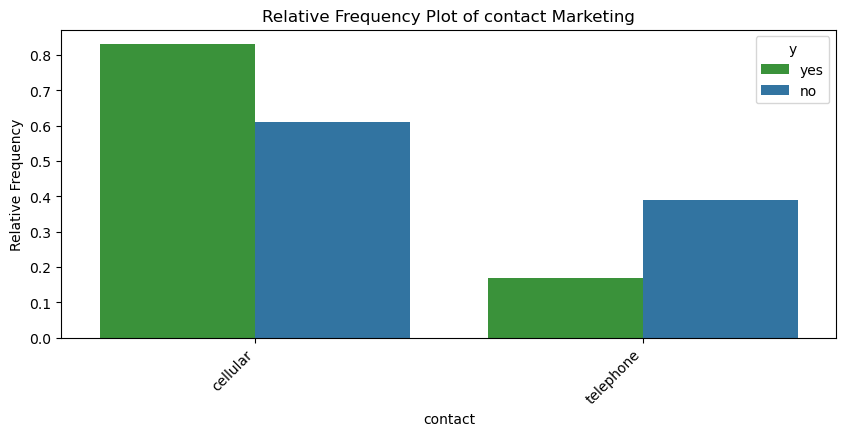

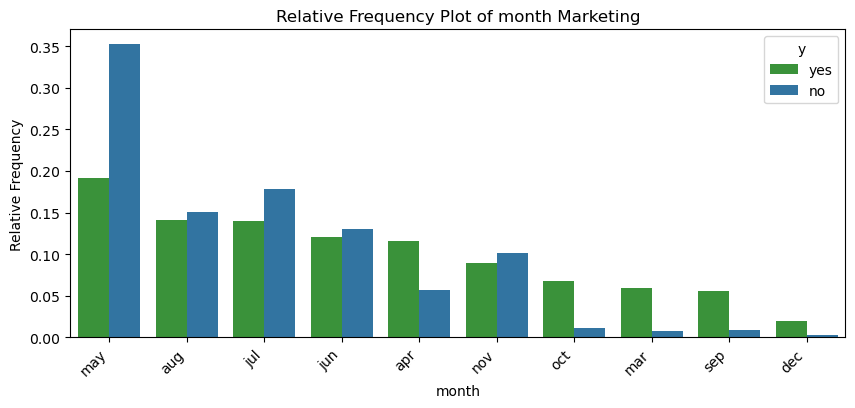

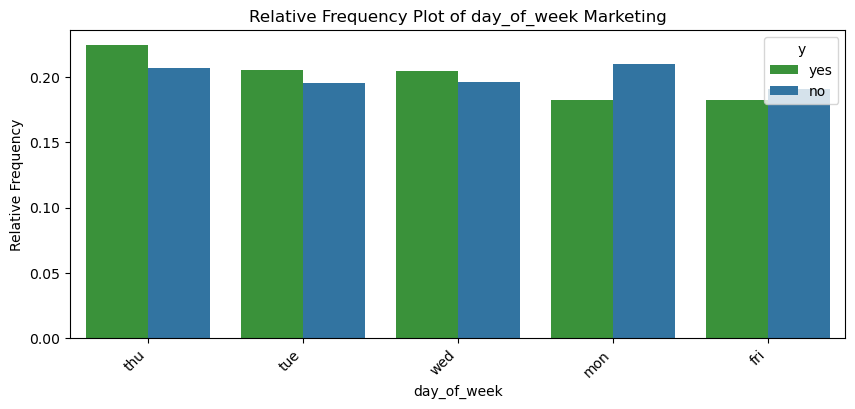

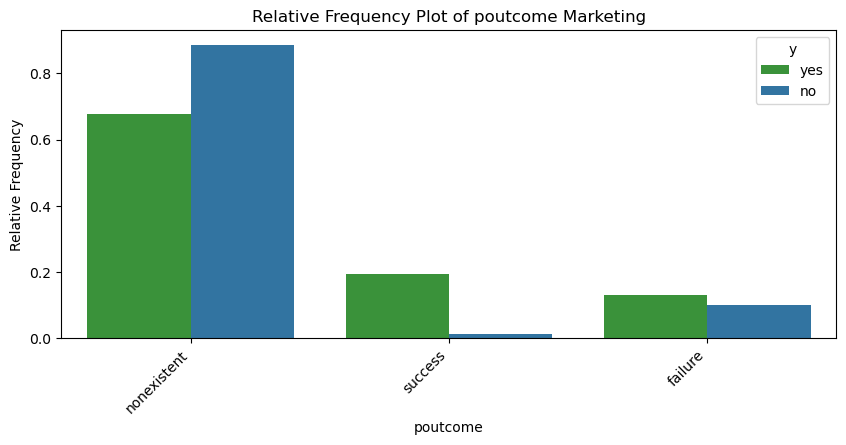

In [11]:
print("Graficando distribuciones y frecuencias según target")

# convirtiendo algunas variables a float para mejor visualización
df_ori.age = df_ori.age.astype(float)
df_ori.duration = df_ori.duration.astype(float)


plot_distributions(df_ori, target=target, title_suffix='Marketing',sample_frac=1)

OBSERVACIONES:

Mucho se puede observar...

Es útil, en esta instancia, considerar el mes? Parece una variable descalanceada, quizas por cuestiones operativas...

Voy a probar CON/SIN mes

In [12]:
### MEJORAR OBSERVACIONES

## Segmentación de las ventas

Para un mejor entendimiento del caso, se procede a segmentar el dataset, para entender las características de los clientes y el contexto en el cuál se convierte.

**Técnica de segmentación**

> RandomForest (RF) para procesar los datos sin fines predictivos:

Se utilizan las hojas activas (como cross features) para medir coincidencias de las muestras en dichas hojas, tomando esto como medida de disimilitud/distancia.

> UMAP para procesar la matriz de disimilitud/distancia del RF

Crea un embedding de dos dimensiones, que permite tanto visualizar como trabajar de manera práctica la representación de las muestras, según su disimilitud/distancia. Similar a t-SNE.

> DBSCAN para crear clusters:

Partiendo de la matriz de disimilitud/distancia creada a partir del RF.

In [14]:
from sklearn.ensemble import  RandomForestClassifier
from umap import UMAP
from sklearn.cluster import DBSCAN

seed=42

### Undersampleo de casos negativos

Para reducir el costo computacional del calculo de la matriz de distancia entre muestras, que sería BigO N^2, vamos a undersamplear pero solo los casos negativos.

In [19]:
pos_index = df_ori.loc[df_ori['y']=='yes'].index
neg_index = df_ori.loc[df_ori['y']=='no']\
    .sample(len(pos_index), random_state=seed).index

under_index = pos_index.union(neg_index)

df_under = df_ori.loc[under_index]

### RandomForest para medir distancia

La simpleza del RF Classifier requiere el encoding de categóricas.

En este caso, no se preve incoveniente de usar un aproach simple como one-hot. En casos con categórticas con cientos de valores únicos, se deberá utilizar alguna técnica de emdebbing o similar.

> NOTA: No se usa un split de validación/testeo, porque en esta segmentación el fin no es predecir, sino explorar los datos.

In [20]:
X_rf = df_under.drop([target], axis=1)
y_rf = df_under[target]

num_features = X_rf.select_dtypes(include=np.number).columns.tolist()
cat_features = X_rf.drop(num_features, axis=1).columns.tolist()

X_encoded = pd.get_dummies(X_rf, columns=cat_features)

model = RandomForestClassifier(n_estimators=100,
        max_depth=28,
        max_features=0.3,
        min_samples_leaf=138,
        min_samples_split=5,
        max_samples=0.7,
        random_state=seed,
        n_jobs=-1,
        oob_score=True)

model.fit(X_encoded, y_rf)

RandomForestClassifier(max_depth=28, max_features=0.3, max_samples=0.7,
                       min_samples_leaf=138, min_samples_split=5, n_jobs=-1,
                       oob_score=True, random_state=42)

Función que calcula la **matriz de distancias** a partir del bosque entrenado:

> NOTA: tarda > 30 min dado que estoy usando todos los datos, y no una muestra undersampleando "no". Esta creando una matriz de N filas x N columnas, elemento por elemento (sin paralelizar).

In [23]:
# md = distanceMatrix(model, X_encoded)

# np.save('eda/distance_matrix_under.npy', md)

md = np.load('eda/distance_matrix_under.npy')

### UMAP (Uniform Manifold Approximation and Projection)

Permite tanto visualizar como trabajar de manera práctica la representación de las muestras, según su disimilitud/distancia. Similar a t-SNE.

In [25]:
embedding_rf = UMAP(n_components=2,
                    n_neighbors=50,
                    metric="precomputed",
                    random_state=seed).fit_transform(md)

embedding_rf

c:\Users\santt\.conda\envs\marketing\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\santt\.conda\envs\marketing\Lib\site-packages\umap\umap_.py:1865: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")
c:\Users\santt\.conda\envs\marketing\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


array([[19.336224 ,  5.3913107],
       [20.661345 ,  7.1883583],
       [19.52303  ,  5.296892 ],
       ...,
       [ 5.2295737, -3.7412097],
       [ 5.1916947, -3.693321 ],
       [ 5.076918 , -3.6169357]], dtype=float32)

Agregando predicciones del RF, solo a modo fin de identificar donde se localizan las ventas en el espacio vectorial del embedding creado.

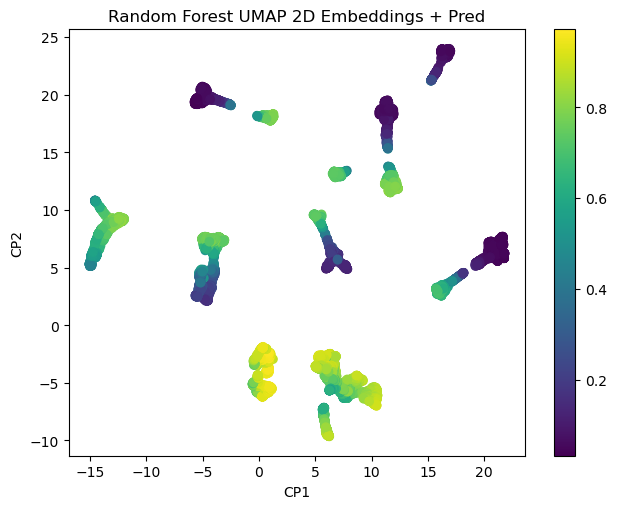

In [ ]:
class_index = np.where(model.classes_ == 'yes')[0]
prob_baja = model.predict_proba(X_encoded)[:,class_index]

plt.scatter(embedding_rf[:,0], embedding_rf[:,1], c=prob_baja)
plt.tight_layout()
plt.colorbar()

plt.title("Random Forest UMAP 2D Embeddings + Pred")

plt.xlabel("CP1")
plt.ylabel("CP2")

plt.show()

OBSERVACIONES:

...

### Clustiering

Aplicación de DBSCAN para agrupar los prospectos. El epsilon es la distancia máxima que permite agrupar dos casos.

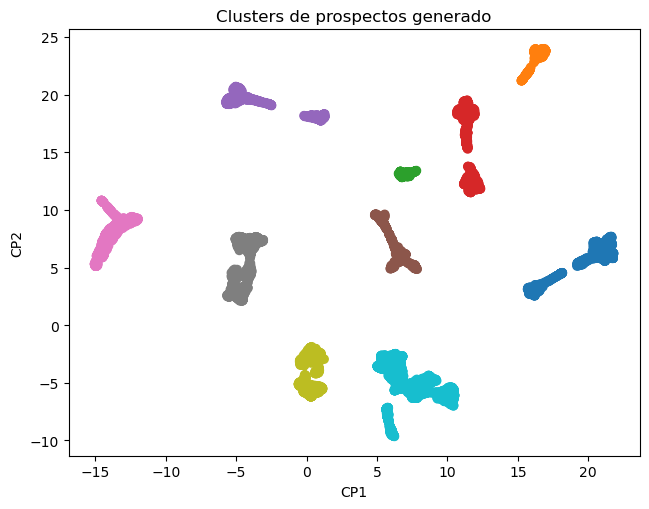

In [69]:
hdb = DBSCAN(eps=3) 
y = hdb.fit(embedding_rf)

plt.scatter(embedding_rf[:, 0], embedding_rf[:, 1], c=y.labels_, cmap='tab10')
plt.tight_layout()

plt.title("Clusters de prospectos generado")

plt.xlabel("CP1")
plt.ylabel("CP2")

plt.show()

### EDA de los clusters

Variables relevantes para cada cluster

In [49]:
df_embedding = pd.DataFrame(embedding_rf, columns=['embedding_1', 'embedding_2'])
df_embedding['cluster'] = y.labels_

clusters = df_embedding['cluster'].unique()

important_features_by_cluster = {}

for cluster in clusters:
  y_binary = (df_embedding['cluster'] == cluster).astype(int)

  model = RandomForestClassifier(random_state=17)
  model.fit(X_encoded, y_binary)

  importances = model.feature_importances_
  feature_names = X_encoded.columns

  indices = np.argsort(importances)[::-1]
  important_features_by_cluster[cluster] = [feature_names[i] for i in indices]

TOP5 de las variables relevantes para cada cluster

In [50]:
for cluster, features in important_features_by_cluster.items():
  print(f"Cluster {cluster} vs. Resto:")
  for feature in features[:5]:
    print(f"  - {feature}")

Cluster 0 vs. Resto:
  - cons.price.idx
  - month_may
  - cons.conf.idx
  - contact_cellular
  - emp.var.rate
Cluster 1 vs. Resto:
  - duration
  - cons.price.idx
  - month_jun
  - cons.conf.idx
  - nr.employed
Cluster 2 vs. Resto:
  - duration
  - cons.price.idx
  - month_jun
  - euribor3m
  - contact_cellular
Cluster 3 vs. Resto:
  - month_jul
  - cons.conf.idx
  - cons.price.idx
  - emp.var.rate
  - euribor3m
Cluster 4 vs. Resto:
  - month_aug
  - cons.conf.idx
  - euribor3m
  - cons.price.idx
  - nr.employed
Cluster 5 vs. Resto:
  - month_nov
  - nr.employed
  - emp.var.rate
  - cons.price.idx
  - euribor3m
Cluster 6 vs. Resto:
  - cons.conf.idx
  - month_apr
  - euribor3m
  - cons.price.idx
  - nr.employed
Cluster 7 vs. Resto:
  - month_may
  - cons.price.idx
  - cons.conf.idx
  - euribor3m
  - nr.employed
Cluster 8 vs. Resto:
  - pdays
  - poutcome_success
  - previous
  - nr.employed
  - poutcome_nonexistent
Cluster 9 vs. Resto:
  - nr.employed
  - euribor3m
  - pdays
  - emp.va

Agrupamos las variables relevantas TOP5 para cada cluster

In [52]:
important_vars_set = set()

for cluster, variables in important_features_by_cluster.items():
    important_vars_set.update(variables[:5])  # Agregar las 5 primeras variables al set

# Mostrar el conjunto resultante
print(important_vars_set)

len(important_vars_set)

{'euribor3m', 'poutcome_success', 'contact_cellular', 'month_jun', 'cons.conf.idx', 'duration', 'cons.price.idx', 'emp.var.rate', 'nr.employed', 'month_jul', 'month_apr', 'previous', 'poutcome_nonexistent', 'month_aug', 'month_may', 'pdays', 'month_nov'}


17

Creación de un dataframe de los casos analizados

Para mejorar la visualización de los clusters

In [59]:
df_clusters = pd.concat([df_under.reset_index(),df_embedding], axis=1)

df_clusters['proba_rf'] = prob_baja

Revelando características de c/cluster

In [60]:
def class_stats(group):
    counts = group['y'].value_counts()
    proportions = group['y'].value_counts(normalize=True)
    return pd.Series({
        'venta_c': counts.get('yes', 0),
        'no-venta_c': counts.get('no', 0),
        'venta_p': proportions.get('yes', 0),
        'no-venta_p': proportions.get('no', 0),
        'proba_rf_mean': group['proba_rf'].mean(),
        'proba_rf_std': group['proba_rf'].std(),
        'proba_rf_min': group['proba_rf'].min(),
        'proba_rf_max': group['proba_rf'].max()
    })

# Aplicar agrupación y agregaciones para los clusters
cluster_stats = df_clusters.groupby('cluster').apply(class_stats).reset_index()

cluster_stats

C:\Users\santt\AppData\Local\Temp\ipykernel_11272\196233041.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cluster_stats = df_clusters.groupby('cluster').apply(class_stats).reset_index()


,cluster,venta_c,no-venta_c,venta_p,no-venta_p,proba_rf_mean,proba_rf_std,proba_rf_min,proba_rf_max
0,0,240.0,958.0,0.200334,0.799666,0.218301,0.250125,0.036916,0.700327
1,1,11.0,462.0,0.023256,0.976744,0.090374,0.060165,0.043889,0.352692
2,2,177.0,44.0,0.800905,0.199095,0.691250,0.070616,0.426305,0.752409
3,3,407.0,774.0,0.344623,0.655377,0.352500,0.328002,0.041908,0.827302
4,4,272.0,644.0,0.296943,0.703057,0.288992,0.310985,0.032489,0.815195
5,5,232.0,456.0,0.337209,0.662791,0.314550,0.249491,0.109500,0.759426
6,6,568.0,268.0,0.679426,0.320574,0.651507,0.109961,0.428530,0.828386
7,7,524.0,684.0,0.433775,0.566225,0.471097,0.234089,0.144206,0.796551
8,8,867.0,41.0,0.954846,0.045154,0.914316,0.052501,0.702043,0.971550
9,9,1341.0,308.0,0.813220,0.186780,0.815474,0.092409,0.546673,0.926721


Visualizando la efectividad de conversión de cada cluster

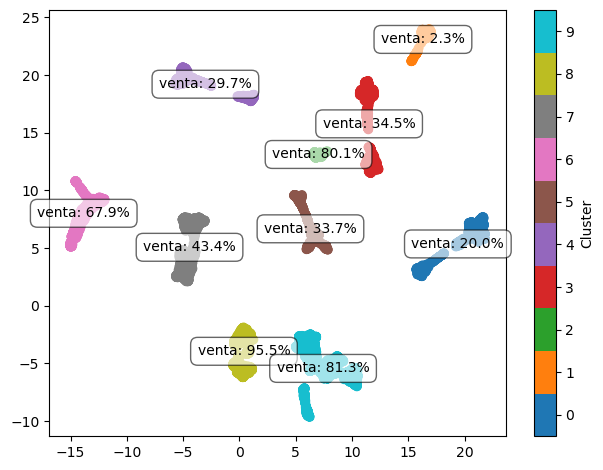

In [ ]:
scatter = plt.scatter(df_clusters.embedding_1, df_clusters.embedding_2, c=df_clusters.cluster.astype(int), cmap='tab10')
for idx, row in cluster_stats.iterrows():
    # Tomar el centro aproximado de cada cluster para colocar el texto
    cluster_center = df_clusters[df_clusters['cluster'] == row['cluster']][['embedding_1', 'embedding_2']].mean()
    
    # Formato de las proporciones
    text_label = f"venta: {100*row['venta_p']:.1f}%"
    
    # Añadir texto al gráfico
    plt.text(cluster_center['embedding_1'], cluster_center['embedding_2'], 
             text_label, fontsize=10, ha='center', va='center', 
             bbox=dict(facecolor='white', alpha=0.6, boxstyle='round,pad=0.5'))

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
cbar = plt.colorbar(scatter, boundaries=np.arange(df_clusters['cluster'].min() - 0.5, 
                                                  df_clusters['cluster'].max() + 1.5, 1))
cbar.set_ticks(np.arange(df_clusters['cluster'].min(), df_clusters['cluster'].max() + 1))
cbar.set_label('Cluster')

plt.show()

#### Explorando distribuciones en los clusters